
<img src="https://img.kaikeba.com/web/hcTech/img_logo.png" alt="图片替换文本" width="500" height="150" align="bottom" />

# Lesson-01 Assignment

   各位同学大家好，欢迎各位开始学习我们的人工智能课程。这门课程假设大家不具备机器学习和人工智能的知识，但是希望大家具备初级的Python编程能力。根据往期同学的实际反馈，我们课程的完结之后 能力能够超过80%的计算机人工智能/深度学习方向的硕士生的能力。

## 本次作业的内容

### 1. Recode all examples;

### 2. Please answer some questions about our course. We do appreciate your help.

   2.1  What do you want to get in this course? 

Answer: 进入大厂去深造

2.2 What problems do you want to solve? 

Answer: 目前做过前端后台，但工资还是只有1万/月

 2.3 What advantages do you have to accomplish your goal?

Answer: 2012年-2016年完成了统计学专业的学习，有一定的数学基础。2016年接触过语音识别相关的内容，2017年参加过GeekPwn语音合成比赛第五名，2018年参加过GeekPwn图像生成比赛第二名，2019、2020年和同事训练部署完成了公司的医院体检单数字识别项目

 2.4 What disadvantages you need to overcome to accomplish your goal?

Answer: 1、没有研究生学历，需要再学习一些基础数学知识、多做一些实战项目；2、目标不明确，容易中途放弃，需要坚持。

2.5 How will you plan to study in this course? 

Answer: 每周按时完成布置的作业，拓展学习与课程相关的知识，每周写一篇自己的经验总结到博客上，巩固消化。

邮箱地址：ymzhang@kaikeba.com  

### 3. 如何提交
提交github地址 或者 提交压缩包到学习平台

https://github.com/Skypow2012/learn-cv

### 4.  理论题
- 4.1 图像有几个通道，通道分别是什么颜色？
    - 图像有三个通道RGB，分别是红、绿、蓝。PNG还有A通道RGBA，透明通道。
- 4.2 图像由 cv2.imread 读取，通道按什么顺序？
    - 蓝、绿、红。
- 4.3 阐述卷积可以干什么？以及图像卷积的过程？（可以图示）
    - 卷积可以到达一种滤波的效果，比如高斯卷积核可以达到模糊图像、去高斯噪音等，拉普拉斯卷积核可以得到图像边缘。
    - 通过计算某一块区域内，按卷积核相乘后，再相加起来，得到最后结果，然后逐步滑动卷积核，算出所有的结果，再放到一个新的矩阵中。
- 4.4 numpy中的np.vstack和np.hstack的区别？（可以代码展示）
    - np.vstack 垂直方向叠加 vertically stack
    - np.hstack 水平方向叠加 horizontally stack

### 5. 完成以下问答和编程练习

5.1.1  请先实现这些函数 **image crop, rotation, Affine Transformand perspective transform** , 记得设置函数的参数。

5.1.2  拓展题：同学可以进一步定义一个函数 **image_color_shift**，将图像的三个通道的像素值，加上一个随机值或者减去一个随机值(假设是正值)。需要注意的是图像的像素值是0-255。



(180, 180, 3)
232
affine M: [[  0.06666667   0.6        -23.33333333]
 [ -0.33333333   1.26666667  53.33333333]]


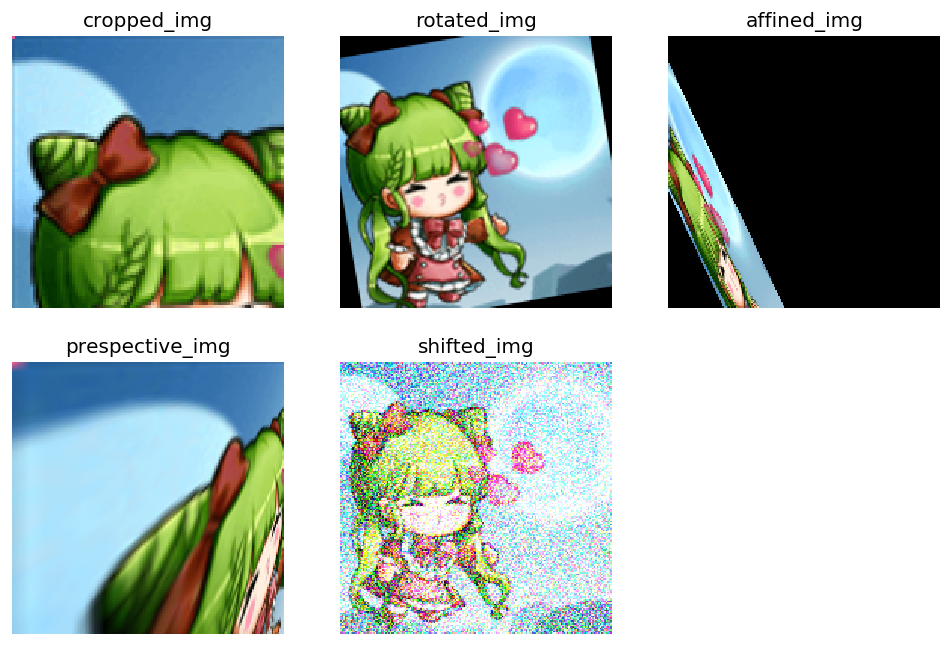

In [169]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt 

class ImageTransformer:

    def image_crop(self, img_ori, x, y, w, h):
        croped_img = img_ori[x:x+w, y:y+h, :]
        return croped_img
        pass


    def rotation(self, img_ori, aug_value, scale): # your code here
        '''
        img_ori: 图像
        aug_value: 旋转角度
        scale: 缩放值
        M :旋转矩阵
        '''
        # 第一个参数代表旋转中心点位置
        M = cv2.getRotationMatrix2D((0.5*img_ori.shape[1], 0.5*img_ori.shape[0]), aug_value, scale)
        new_img = cv2.warpAffine(img_ori, M, (img_ori.shape[1], img_ori.shape[0]))
        return new_img
        pass

    def affine_transform(self, img_ori, src, dst): # your code here
        M = cv2.getAffineTransform(src, dst)
        print('affine M:',M)
        new_img = cv2.warpAffine(img_ori, M, (img_ori.shape[1], img_ori.shape[0]))
        return new_img
        pass
    
    def perspective_transform(self, img_ori, pts1, pts2): # your code here
        #计算转换M矩阵
        rows,cols = img_ori.shape[:2]
        M = cv2.getPerspectiveTransform(pts1,pts2)

        #应用M矩阵到原图像
        dst = cv2.warpPerspective(img_ori,M,(cols,rows))
        return dst
        pass

    def image_color_shift(self, img_ori):
        _img = np.copy(img_ori)
        for x in range(_img.shape[0]):
            for y in range(_img.shape[1]):
                for z in range(_img.shape[2]):
                    randomI = random.randint(-50, 200)
                    tar = _img[x,y,z] + randomI
                    if (tar < 0):
                        tar = 0
                    if (tar > 255):
                        tar = 255
                    _img[x,y,z] = tar
        return _img
        pass

if __name__ =="__main__":
    
    transformer = ImageTransformer()
    img_bgr = cv2.imread('20190801124038.png') # your image
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    print(img.shape)
    rows,cols = img.shape[:2]
    img[0,0,0] = 1000
    print(img[0,0,0])
    
    # 裁剪图像
    cropped_img = transformer.image_crop(img, 0, 0, img.shape[0] - 90, img.shape[1] - 90)
    
    # 旋转图像
    rotated_img = transformer.rotation(img, 10, 1)
    
    # 仿射图像
    src = np.float32([[50, 50], [200, 50], [50, 200]])
    dst = np.float32([[10, 100], [20, 50], [100, 290]])
    affined_img = transformer.affine_transform(img, src, dst)
    
    # 投影图像
    #选取原图中需要被转换物体的四个顶点
    pts1 = np.float32([[0,30],[90,180],[0,0],[90,0]])
    #设置在新图像中原图像的四个顶点的位置
    pts2 = np.float32([[0,rows],[cols,rows],[0,0],[cols,0]])
    prespective_img = transformer.perspective_transform(img, pts1, pts2)
    
    # 随机移动变化图片颜色
    shifted_img = transformer.image_color_shift(img)

    plt.figure(figsize=(10,6.6),dpi=120)
    plt.subplot(231),plt.imshow(cropped_img),plt.title('cropped_img'), plt.axis('off') #坐标轴关闭
    plt.subplot(232),plt.imshow(rotated_img),plt.title('rotated_img'), plt.axis('off')
    plt.subplot(233),plt.imshow(affined_img),plt.title('affined_img'), plt.axis('off')
    plt.subplot(234),plt.imshow(prespective_img),plt.title('prespective_img'), plt.axis('off')
    plt.subplot(235),plt.imshow(shifted_img),plt.title('shifted_img'), plt.axis('off')
    plt.show()
    
    

各位同学，你已经把课上关于图像增广实现了！

5.2  请实现一个图像的前景放在另一个图像上面。

90 90 3


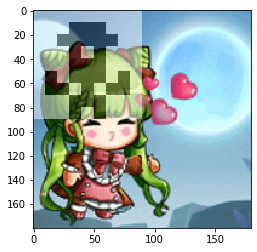

In [200]:
import cv2
import random
import numpy as np

# your code here
img1 = cv2.imread('maxmon.jpg')
img_bgr = cv2.imread('20190801124038.png') # your image
img2 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def mix2Img(srcImg, mark):
    _img = np.copy(srcImg)
    limitX = srcImg.shape[0] if srcImg.shape[0] < mark.shape[0] else mark.shape[0]
    limitY = srcImg.shape[1] if srcImg.shape[1] < mark.shape[1] else mark.shape[1]
    limitZ = srcImg.shape[2] if srcImg.shape[2] < mark.shape[2] else mark.shape[2]
    print(limitX, limitY, limitZ)
    for x in range(limitX):
        for y in range(limitY):
            for z in range(limitZ):
                tar = int((srcImg[x,y,z]/2 + mark[x,y,z]/2))
                if (tar < 0):
                    tar = 0
                if (tar > 255):
                    tar = 255
                _img[x,y,z] = tar
    return _img
tarImg = mix2Img(img2, img1)
plt.imshow(tarImg)



各位同学，你已经把图像的感兴趣区域提取了，并且实现了图像融合！

这次的作业就到这里了！祝大家学习进步！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)